**Problem Statement** - A business could use census data to identify potential customers in a particular geographic area or to develop marketing campaigns targeted towards a specific demographic group. A government agency could use census data to allocate resources for public services, such as schools, healthcare facilities, and infrastructure. A non-profit organization could use census data to identify areas of need and target their services towards the populations most in need.



---




## Pipelines that performed:

1. Data loading

2. Data preprocessing

3. Exploratory data analysis (EDA)

4. Feature Engineering

5. Model building using supervised learning

6. Model training and evaluation


### 1. Importing **Libraries** & Data Loading

In [2]:
# !pip install folium

In [3]:
# Importing libarary 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium.plugins import MarkerCluster

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, \
recall_score, roc_auc_score, roc_curve, mean_absolute_error

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:

# Loading Dataset and adding columns names based on adult.names file
census_df = pd.read_csv("adult.data", names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'], na_values = [" ?"]) # replacing "?" from dataset and treating as Null values

In [5]:
# Loading test dataset and adding columns names based on on adult.names file
census_df_test = pd.read_csv("adult.test", names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'], na_values = [" ?"]) # replacing "?" from test dataset and treating as Null values

In [6]:
census_df.head() # checking top 5 entries of datasets

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
census_df.tail() # checking bottom 5 entries of datasets

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
census_df_test.head() # checking bottom 5 entries of test datasets

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
print(census_df.shape, census_df_test.shape) # checking dimensionality of datasets

(32561, 15) (16281, 15)


In [10]:
census_df.info() # Inspecting the dataframe to understand the given data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


* **Observation** We have 15 Features(Columns) with 9 object variable and 6 numeric variables, with total entries od 32,561

In [11]:
# Inspecting the dataframe to understand the given test data.
census_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education.num   16281 non-null  int64 
 5   marital.status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital.gain    16281 non-null  int64 
 11  capital.loss    16281 non-null  int64 
 12  hours.per.week  16281 non-null  int64 
 13  native.country  16007 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


* **Observation** We have 15 Features(Columns) with 9 object variable and 6 numeric variables, with total entries od 16,281

###### Features Types and classes
* **age**: continuous.
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: continuous.
* **capital-loss**: continuous.
* **hours-per-week**: continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [12]:
# The stats of numeric data column score
census_df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


* **Observation** Here we see the mean, count, std deviation, percentiles, and min-max values of all the numeric features.

### 2. Data Preprocessing


#### Stripping whitespace from object columns

In [13]:
# removing right white space from objects columns
census_df['workclass'] = census_df['workclass'].str.replace(" ", "")
census_df['education'] = census_df['education'].str.replace(" ", "")
census_df['marital.status'] = census_df['marital.status'].str.replace(" ", "")
census_df['occupation'] = census_df['occupation'].str.replace(" ", "")
census_df['relationship'] = census_df['relationship'].str.replace(" ", "")
census_df['race'] = census_df['race'].str.replace(" ", "")
census_df['sex'] = census_df['sex'].str.replace(" ", "")
census_df['education'] = census_df['education'].str.replace(" ", "")
census_df['income'] = census_df['income'].str.replace(" ", "")
census_df['native.country'] = census_df['native.country'].str.replace(" ", "")

In [14]:
# removing right white space from objects columns, test dataset
census_df_test['workclass'] = census_df_test['workclass'].str.replace(" ", "")
census_df_test['education'] = census_df_test['education'].str.replace(" ", "")
census_df_test['marital.status'] = census_df_test['marital.status'].str.replace(" ", "")
census_df_test['occupation'] = census_df_test['occupation'].str.replace(" ", "")
census_df_test['relationship'] = census_df_test['relationship'].str.replace(" ", "")
census_df_test['race'] = census_df_test['race'].str.replace(" ", "")
census_df_test['sex'] = census_df_test['sex'].str.replace(" ", "")
census_df_test['education'] = census_df_test['education'].str.replace(" ", "")
census_df_test['income'] = census_df_test['income'].str.replace(" ", "")
census_df_test['income'] = census_df_test['income'].str.replace(".", "")
census_df_test['native.country'] = census_df_test['native.country'].str.replace(" ", "")

Text(0.5, 1.0, 'Missing value in the dataset')

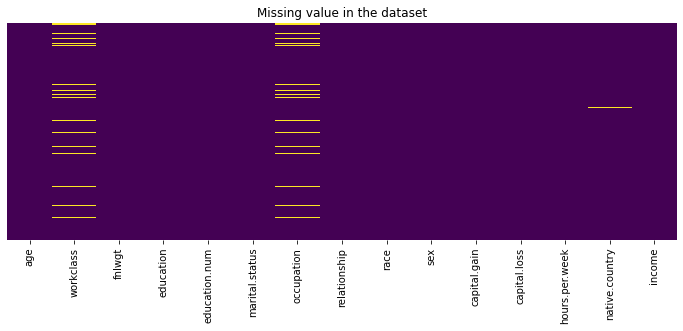

In [15]:
# Plotting the missing values from datasets
plt.figure(figsize=(12,4))
sns.heatmap(census_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

* **Observation** We can see the `workclass`, `occupation` and `native.country` variables have missing values in: datasets.

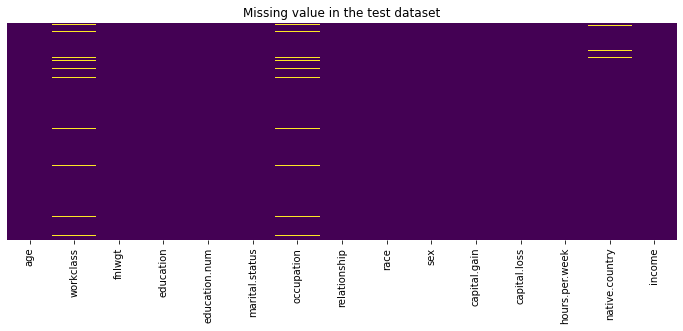

In [16]:
# Plotting the missing values from test datasets
plt.figure(figsize=(12,4))
sns.heatmap(census_df_test.isnull(),cbar=False, cmap='viridis',yticklabels=False)
plt.title('Missing value in the test dataset');

* **Observation** We can see `workclass`, `occupation` and `native.country`  variables also have missing values in test datasets.

* Now we are counting the total missing values for each features in both datasets


In [17]:
# Inspecting the number of missing values percentage
print("Finding missing values")
print(round(census_df.isna().sum()* 100 / 32561, 2))
print("In Testing Data --- \n" ,round(census_df_test.isna().sum()* 100 / 16281, 2))

Finding missing values
age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.79
income            0.00
dtype: float64
In Testing Data --- 
 age               0.00
workclass         5.91
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.93
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.68
income            0.00
dtype: float64


#### Handel Missing Values
* Now Handelin those missing values in both datasets

In [18]:
# We are replacing null values with higher frequency values in particular column
census_df['workclass'].replace([np.nan], census_df['workclass'].mode()[0], inplace=True)
census_df['occupation'].replace([np.nan], census_df['occupation'].mode()[0], inplace=True)
census_df['native.country'].replace([np.nan], census_df['native.country'].mode()[0], inplace=True)

# Also doing for test dataset 
census_df_test['workclass'].replace([np.nan], census_df_test['workclass'].mode()[0], inplace=True)
census_df_test['occupation'].replace([np.nan], census_df_test['occupation'].mode()[0], inplace=True)
census_df_test['native.country'].replace([np.nan], census_df_test['native.country'].mode()[0], inplace=True)

In [19]:
print("Checking missing values again")
print(round(census_df.isna().sum()* 100 / 32561, 2))
print("In Testing Data --- \n" ,round(census_df_test.isna().sum()* 100 / 16281, 2))

Checking missing values again
age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
dtype: float64
In Testing Data --- 
 age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
dtype: float64


* **Observation** Now we can see, we rid-off the missing values from dataset.

### 3. Exploratory data analysis

#### Pie - Percentage Distribution of Target(Income) variable


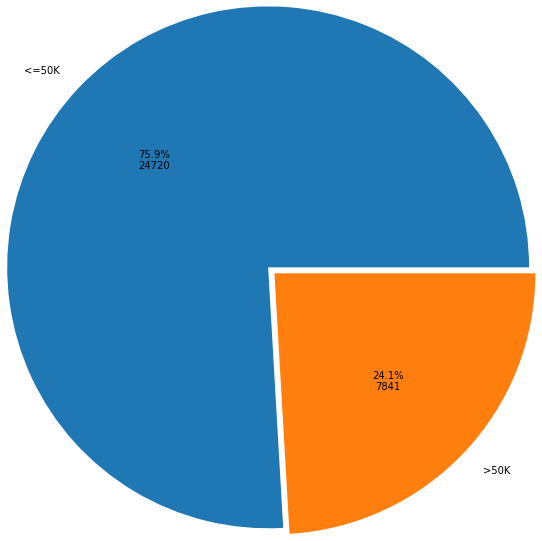

In [20]:
colors = sns.color_palette('dark')
total = census_df['income'].value_counts().values.sum()
explode = [0, 0.1]

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(census_df['income'].value_counts().values, labels=census_df['income'].value_counts().index,
        radius=3, explode=explode, autopct=fmt)
plt.show()

* **Observation**: Here we can see `<=50k` class have 75.9% of distribution whereas `>50k` have 24.1% of distribution.
* We can see its **binary classification** problem and also distribution between two classes is **imbalance**.

* Converting Target datatype object to int class.

In [21]:
# Reformat target column for both dataset
census_df['income'] = census_df['income'].map({'<=50K': 0, '>50K': 1})
census_df_test['income'] = census_df_test['income'].map({'<=50K': 0, '>50K': 1})

census_df.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


#### PairPlot - Summarising whole dataset in a single figure

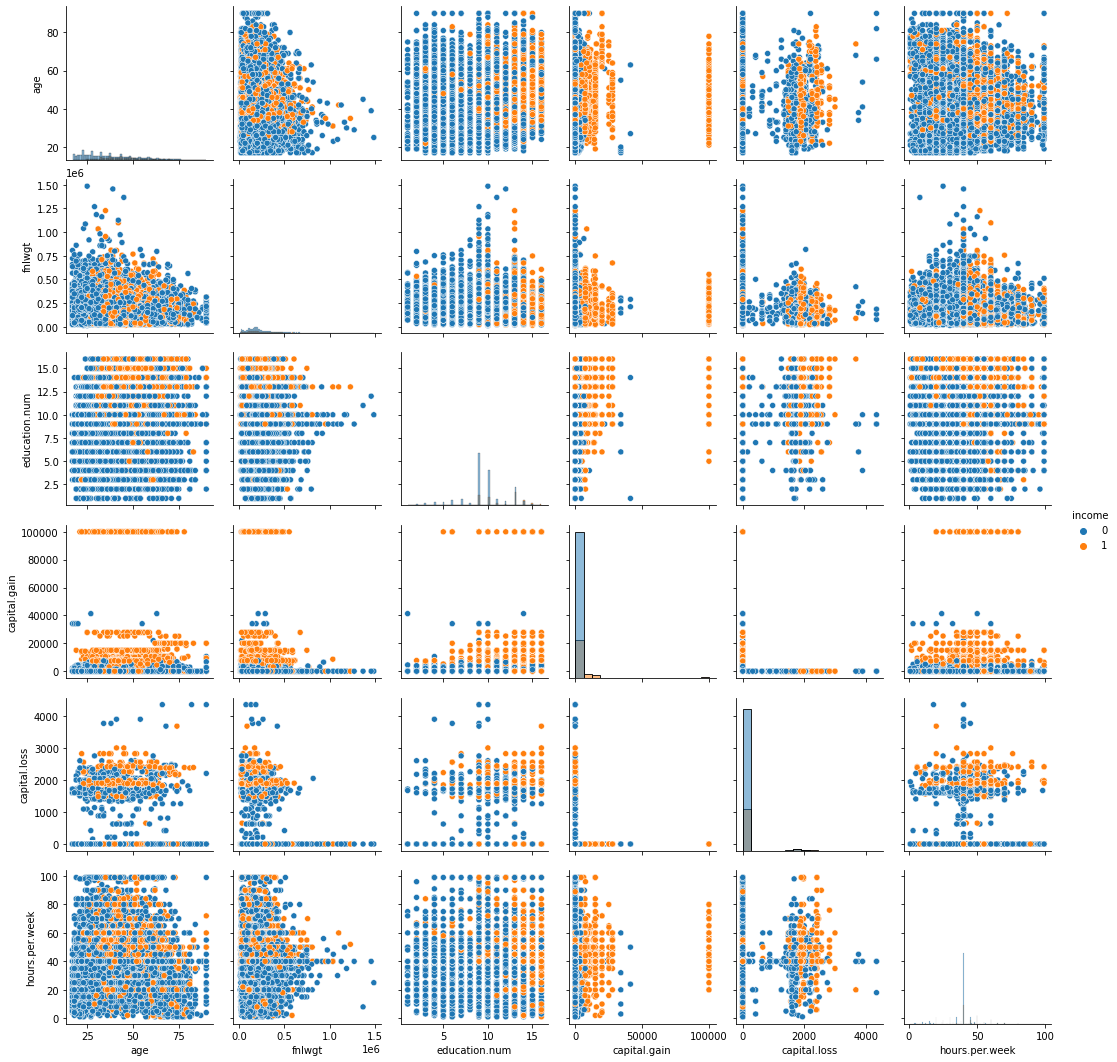

In [22]:
sns.pairplot(census_df, hue="income", diag_kind="hist")
plt.show()

* **Observation**: Here we see a the best set of features and the most separated clusters, diagonal plots are treated as univariate distribution plot, and other are corelation features

In [23]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

#### **Head-Map-correlation** Shows relation between numeric variables





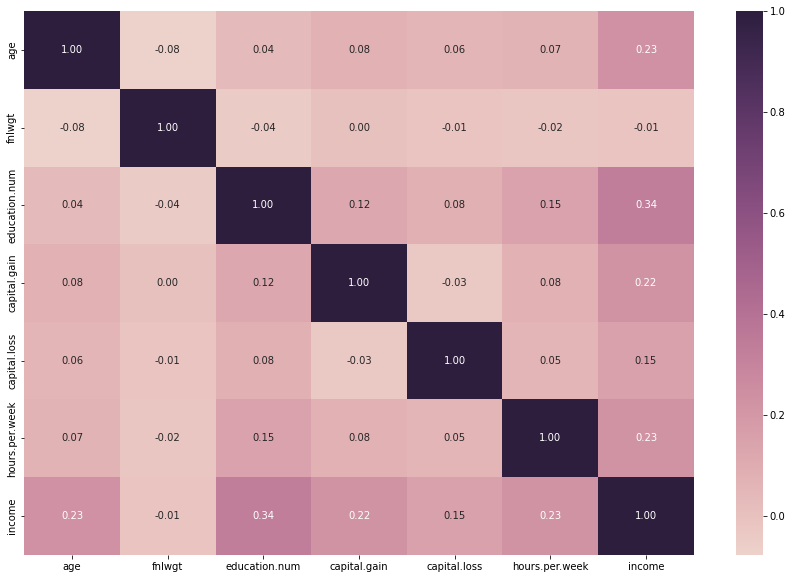

In [24]:
corr = census_df[numeric_features].corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True), fmt = ".2f", annot= True, ax = ax)
plt.show()

* We can see Feature-to-Feature & Feature-to-Label’s Pearson Correlation Coefficients of dataset using Heat map (with 0-1 scale).

* We can see `age`, `hours.per.week` and `education.num` are highly correlated to Target variable.

#### **Histogram** - We can see the distribution of target variable

Text(0.5, 1.0, 'Frequency Distribution of Target Column')

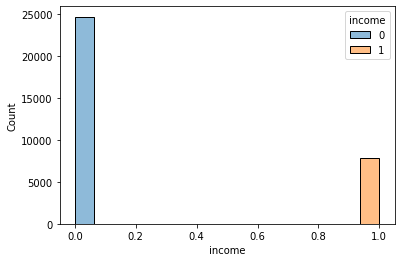

In [25]:
sns.histplot(census_df, x ='income',hue="income",label="Count")
ax.set_title('Frequency Distribution of Target Column')


* **Observation**: We can see the target variable is highly imbalance.

* **Violin** - For checking Interquartile range of features

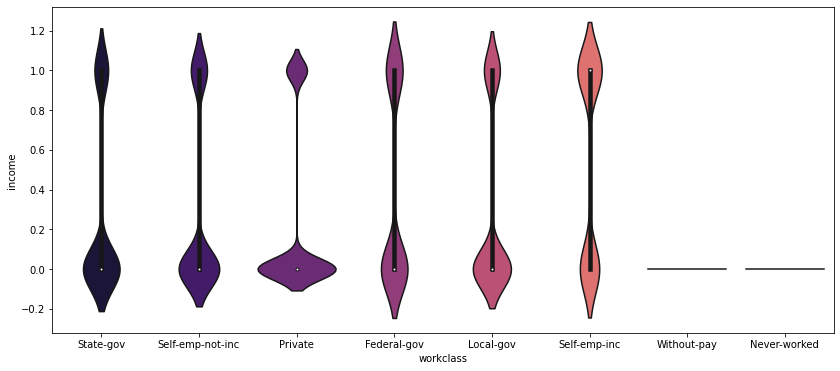

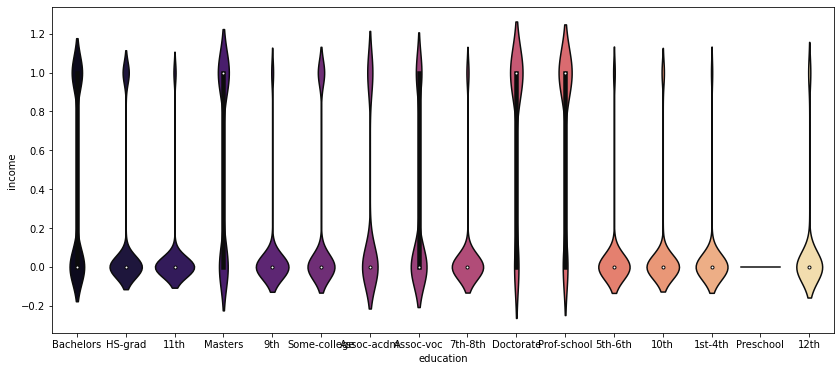

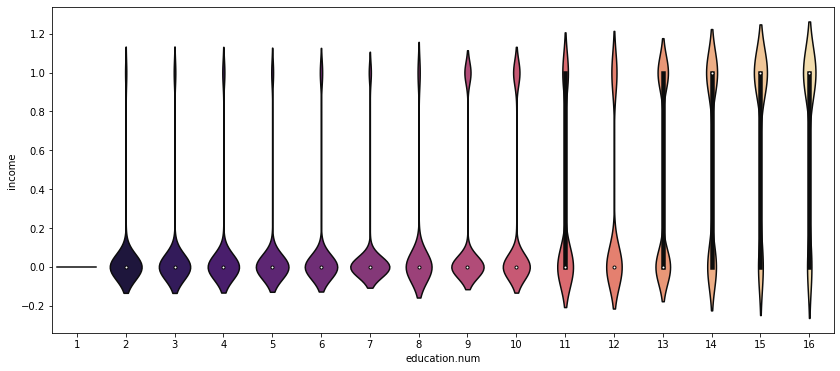

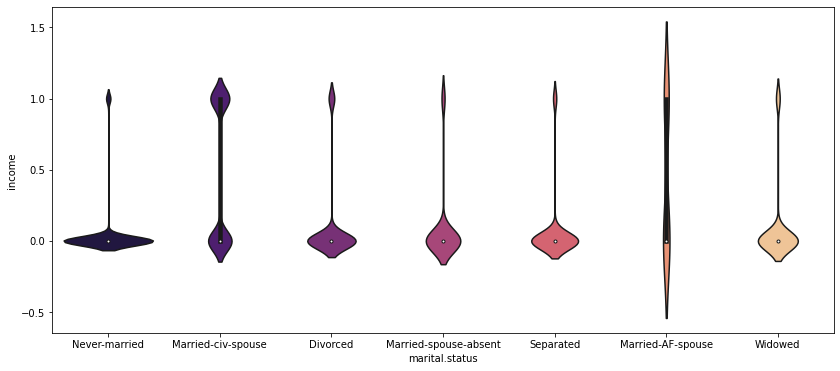

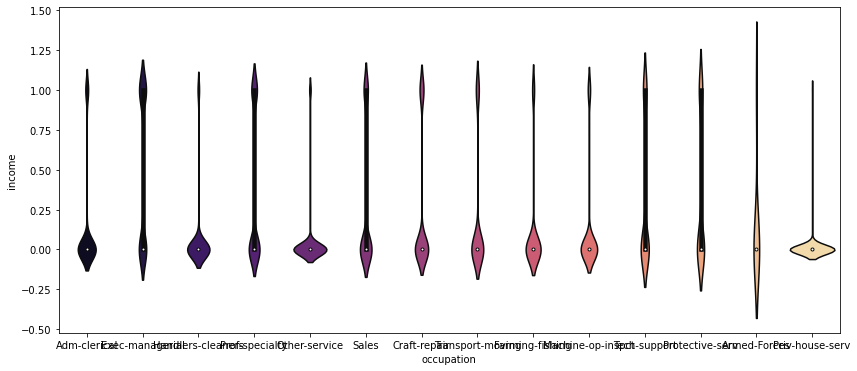

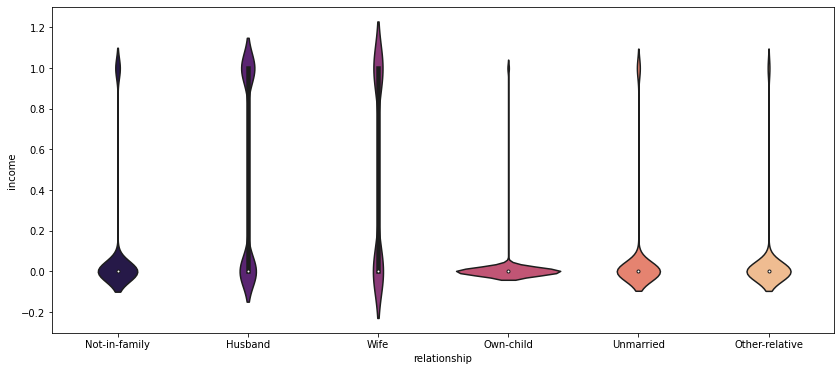

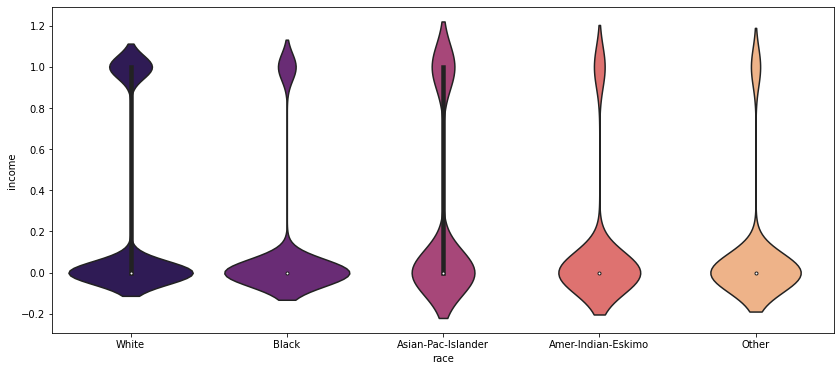

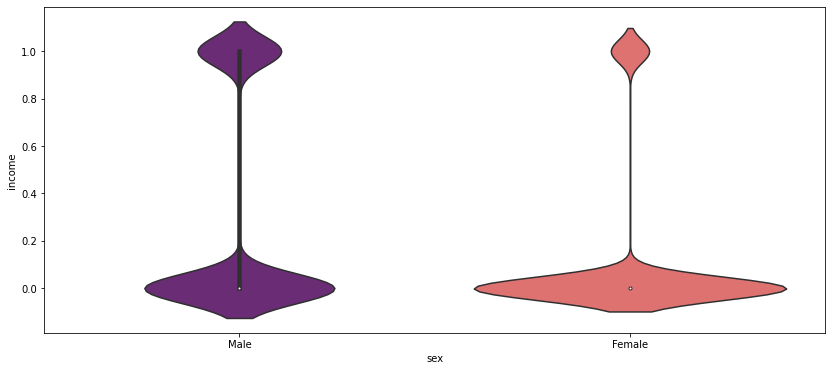

In [26]:
names_lis = [ 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex']

for i, nam in enumerate(names_lis):
  f = plt.figure(figsize=(14,6))
  
  sns.violinplot(x=nam, y='income',data=census_df ,palette='magma')
  ax.set_title('Violin plot of season vs cnt')

* **Observation**: Comparison of distributions between categorical columns vvs target column, we can see in features `peaks`, `valleys`, and `tails` are different.

#### **BoxPlot** - Checking Interquartile range of continuous variables

<Axes: xlabel='education.num'>

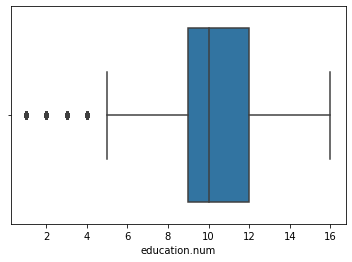

In [27]:
# Box plot for continuous variable
sns.boxplot(x=census_df['education.num'])

<Axes: xlabel='hours.per.week'>

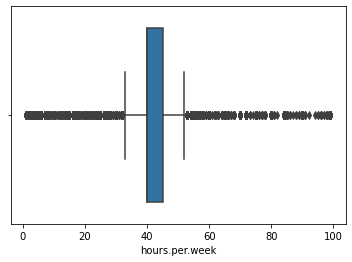

In [28]:
sns.boxplot(x=census_df['hours.per.week'])

* **Observation** : Here we can see `hours.per.week` plot, boxplot shows its have outliers but they are not outliers actually.

#### **Catplot** - Bi-grams (showing relation between features and target variable)

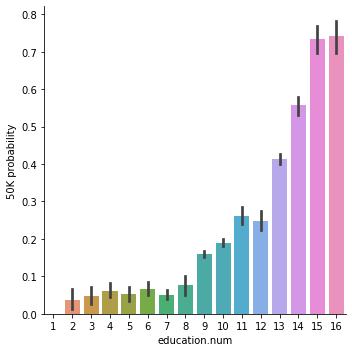

In [29]:
# Explore Education Num vs Income
g = sns.catplot(x="education.num",y="income",data=census_df,kind="bar")
g = g.set_ylabels("50K probability")

* **Obervation** we can see the corelation between `income` & `education.num` and this features is **left skewed**.

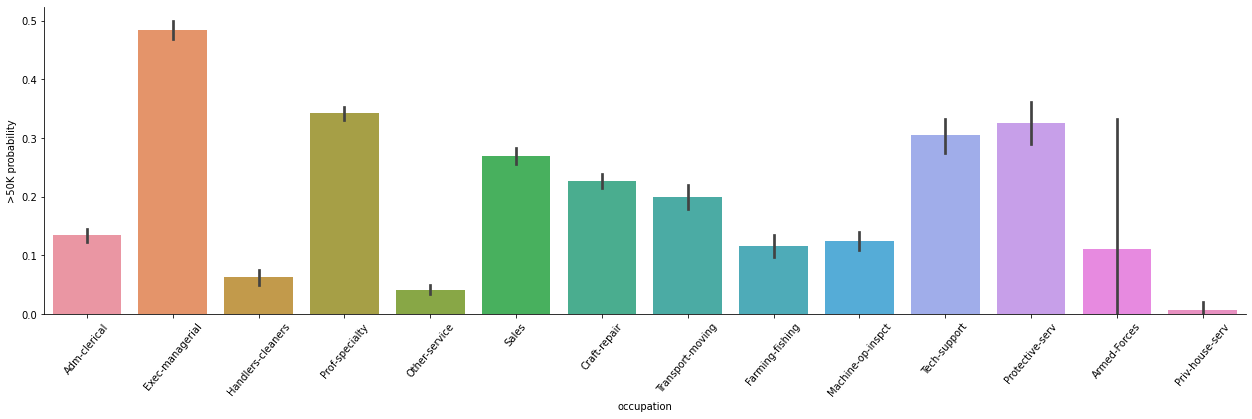

In [30]:
# Explore occupation vs Income
g  = sns.catplot(x="occupation",y="income",data=census_df,kind="bar", height=5, aspect=3.5)
g = g.set_ylabels(">50K probability")
g = g.set_xticklabels(rotation=50)

* **Observation** - In this observation we can see that Exec-managerial have high Salary ratios.

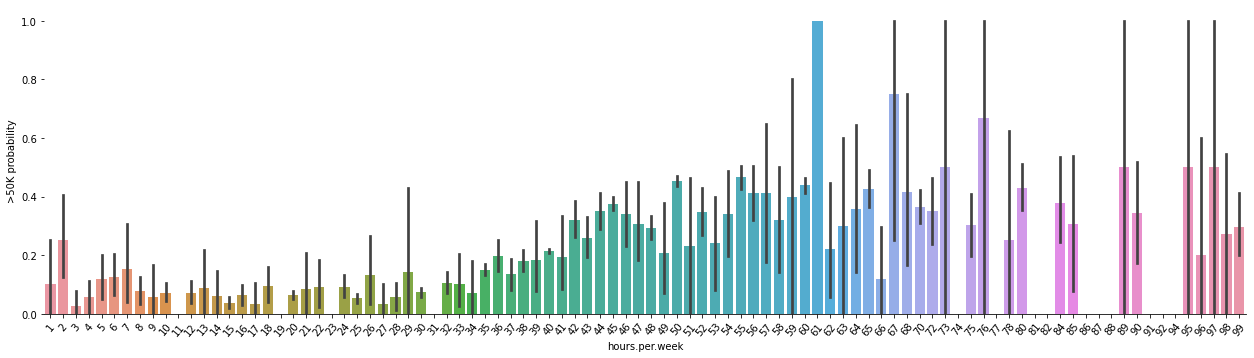

In [31]:
# Explore Hours Per Week vs Income
g  = sns.catplot(x="hours.per.week",y="income",data=census_df,kind="bar", height=5, aspect=3.5)
g.despine(left=True)
g = g.set_ylabels(">50K probability")
g = g.set_xticklabels(rotation=50)

* **Observation** - `hours.per.week` variable have average of 40 hours and incomes are high when people are working more than average hours in a week.

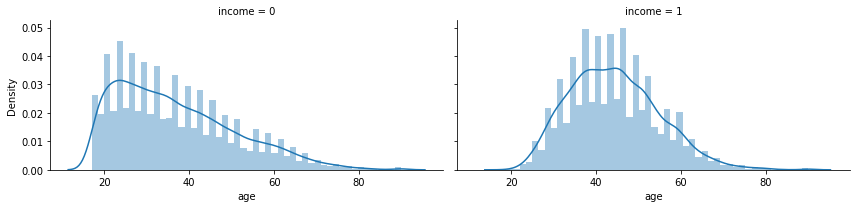

In [32]:
# Explore Age vs Income
g = sns.FacetGrid(census_df, col='income',height=3, aspect=2)
g = g.map(sns.distplot, "age")


* **Observation** - We can see the normal distribution `income` over `age`.

In [33]:
plt.close(g.fig)

#### Categorical Data Analysis

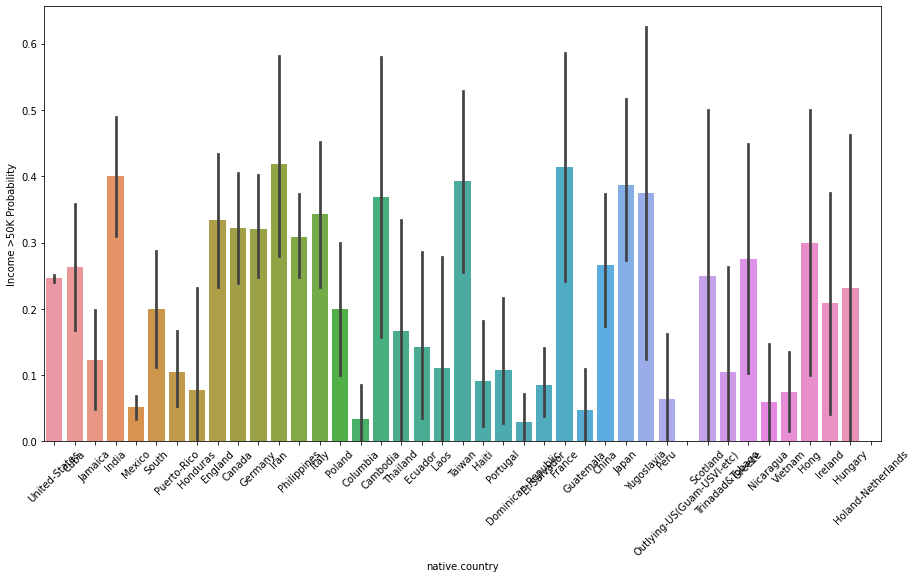

In [34]:
# Explore Native Nation vs Income
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.barplot(x="native.country",y="income",data=census_df, ax=ax)
g = g.set_ylabel("Income >50K Probability")
g = plt.xticks(rotation = 45)

In [35]:
# checking the ratio of indians earning less and greater
census_df[census_df['native.country'] =='India']['income'].value_counts()

0    60
1    40
Name: income, dtype: int64

In [36]:
# checking the ratio of us citizens earning less and greater
census_df[census_df['native.country'] =='United-States']['income'].value_counts()

0    22436
1     7317
Name: income, dtype: int64

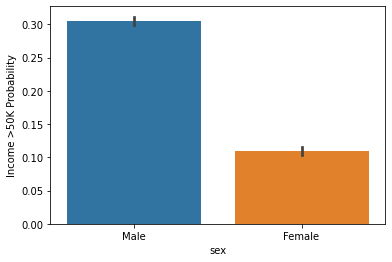

In [37]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=census_df)
g = g.set_ylabel("Income >50K Probability")

* **Observation**: Male are more than twice of females in earning.

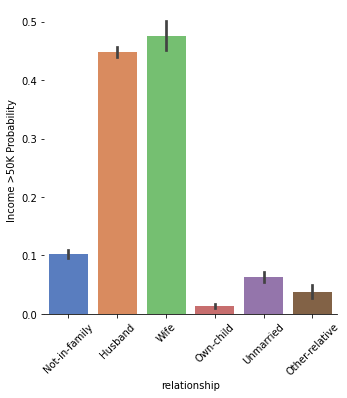

In [38]:
# Explore Relationship vs Income
g = sns.catplot(x="relationship",y="income",data=census_df,kind="bar",
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g = g.set_xticklabels(rotation=45)

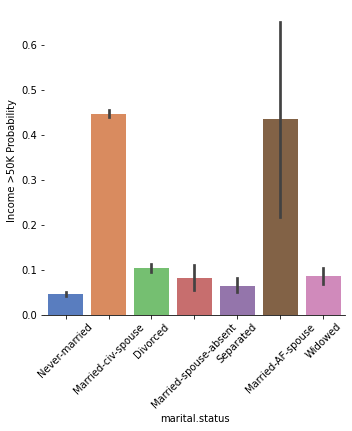

In [39]:
# Explore Marital Status vs Income
g = sns.catplot(x="marital.status",y="income",data=census_df,kind="bar",
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g = g.set_xticklabels(rotation=45)


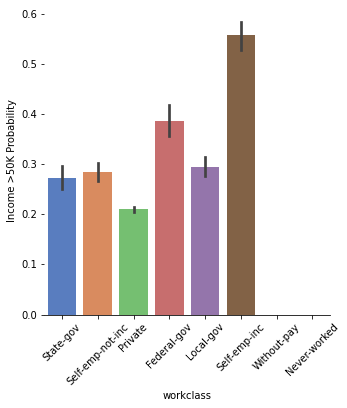

In [40]:
# Explore Workclass vs Income
g = sns.catplot(x="workclass",y="income",data=census_df,kind="bar",
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g = g.set_xticklabels(rotation=45)

#### **World Map** - Ploting Countries frequencies in world map 

In [41]:
df = pd.read_csv("/content/countries_details")

world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['count'],
                                   df.iloc[i]['freq']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
        
world_map

* With Zoom-in we can see the frequencies of each countries

### 4. Feature Engineering

Converting string categorical column into numeric (label encoding)

In [42]:
# Convert Sex value to 0 and 1
census_df["sex"] = census_df["sex"].map({"Male": 0, "Female":1})
# Create Married Column - Binary Yes(1) or No(0)
census_df["marital.status"] = census_df["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
census_df["marital.status"] = census_df["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
census_df["marital.status"] = census_df["marital.status"].map({"Married":1, "Single":0})
census_df["marital.status"] = census_df["marital.status"].astype(int)

# Convert Sex value to 0 and 1 with test data
census_df_test["sex"] = census_df_test["sex"].map({"Male": 0, "Female":1})
census_df_test["marital.status"] = census_df_test["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
census_df_test["marital.status"] = census_df_test["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
census_df_test["marital.status"] = census_df_test["marital.status"].map({"Married":1, "Single":0})
census_df_test["marital.status"] = census_df_test["marital.status"].astype(int)

* **Label Encoder** - Transform non-numerical labels to numerical labels.

In [43]:
columnsToEncode = ["workclass","education","occupation","relationship","race","native.country"]
le = LabelEncoder()
for feature in columnsToEncode:
    census_df[feature] = le.fit_transform(census_df[feature])

# Label encoding for test data
le = LabelEncoder()
for feature in columnsToEncode:
    census_df_test[feature] = le.fit_transform(census_df_test[feature])

In [44]:
census_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,6,77516,9,13,0,0,1,4,0,2174,0,40,38,0
1,50,5,83311,9,13,1,3,0,4,0,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,0,0,0,40,38,0
3,53,3,234721,1,7,1,5,0,2,0,0,0,40,38,0
4,28,3,338409,9,13,1,9,5,2,1,0,0,40,4,0


In [45]:
census_df_test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,3,226802,1,7,0,6,3,2,0,0,0,40,37,0
1,38,3,89814,11,9,1,4,0,4,0,0,0,50,37,0
2,28,1,336951,7,12,1,10,0,4,0,0,0,40,37,1
3,44,3,160323,15,10,1,6,0,2,0,7688,0,40,37,1
4,18,3,103497,15,10,0,9,3,4,1,0,0,30,37,0


#### **PCA** - for feature selection, (checking top features)

In [46]:
# Spliting dataset into X and Y, X will have independent and dependent variables
array = census_df.values
X = array[:,0:14]
Y = array[:,14]

0.8359104793444304


<BarContainer object of 14 artists>

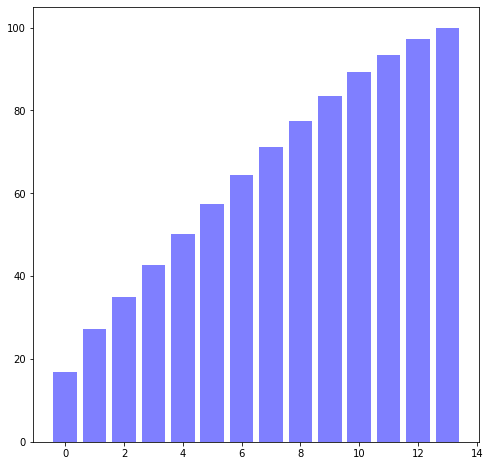

In [47]:
# standardizing the data values into a standard format
X_std = StandardScaler().fit_transform(X)

# Checking the impor
sklearn_pca = sklearnPCA(n_components=14)
Y_sklearn = sklearn_pca.fit_transform(X_std)

cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()
print(sklearn_pca.explained_variance_ratio_[:10].sum())

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(14), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)


* **Observation** - As you can see every feature adds significant variance hence droping the variables in this case is not a good idea! Therefore we should use every feature present to build our model as done previously.

### 5. Model building using supervised learning (Model Selection)

In [48]:
def evaluate_model(actual, pred):
    '''
    - This method gets 2 series (actual and predicted) as inputs and compute the accuracy, ROC, Precision and Recall scores  
    - Then returns the computed scores. 
    '''
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    
    return acc_score, roc_score, prec_score, rec_score

* **Model Experiment** - Applying top 10 Suppervise Machine learning model (checking their metrics)

In [49]:
num_folds = 10 # no. of folder for kfolds
scoring = 'accuracy'

X_train, Y_train = census_df.drop(["income"], axis=1), census_df["income"]
X_test, Y_test = census_df_test.drop(["income"], axis=1), census_df_test["income"]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = [] # appending models into list
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant', LinearDiscriminantAnalysis()))
models.append(('K Neighbors', KNeighborsClassifier()))
models.append(('Light GBM', LGBMClassifier()))
models.append(('Gaussian Naive', GaussianNB()))
models.append(('XG Boost', XGBClassifier()))
models.append(('Gradient Boost', GradientBoostingClassifier()))
models.append(('Hist-Gradient Boost', HistGradientBoostingClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

# evalutate each model in turn
results = []
names = []
model_score_list = []


for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
    results.append(cv_results)
    names.append(name)
    model_score_list.append({'model_name':name, 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.840607 (0.006790)
Linear Discriminant: 0.831056 (0.007471)
K Neighbors: 0.828169 (0.004619)
Light GBM: 0.872977 (0.004782)
Gaussian Naive: 0.811462 (0.006377)
XG Boost: 0.870213 (0.004143)
Gradient Boost: 0.864624 (0.005435)
Hist-Gradient Boost: 0.872179 (0.005272)
Decision Tree: 0.810203 (0.006894)
Random Forest: 0.857407 (0.006159)


* Checking Which model is good for training, with the help of scores.

In [50]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])
model_score_df.head(10)

,model_name,acc_score,roc_score,precision_score,recall_score
0,Logistic Regression,84.31,74.11,72.08,54.78
1,Linear Discriminant,83.27,72.72,69.16,52.70
2,K Neighbors,83.12,74.45,66.32,58.01
3,Light GBM,87.37,79.37,78.43,64.20
4,Gaussian Naive,81.28,66.44,68.56,38.33
5,XG Boost,87.11,78.54,78.71,62.30
6,Gradient Boost,86.73,77.43,78.93,59.80
7,Hist-Gradient Boost,87.26,79.46,77.67,64.66
8,Decision Tree,81.01,74.50,59.38,62.14
9,Random Forest,85.64,76.92,74.03,60.40


* We can select **`RandomForest`** there is less difference between train and test accuracy and since its working with subsets of data, it will be better model for pipeline.

#### Now checking the overfitting of model


In [51]:
X, y = census_df.drop(["income"], axis=1), census_df["income"]

In [52]:
kf = KFold(n_splits=4)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):
    
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model = RandomForestClassifier()
   model.fit(X_train, y_train)
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

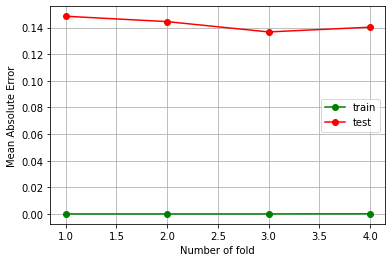

In [53]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

* **Observation** - Training loss is low and testing loss is high, We can see there is huge difference between train loss and test loss, hince its ***overfitting***

#### **GridSearchCV** is trying to find the best hyperparameters for model

In [54]:
param_grid = { 
    'n_estimators': [10, 20, 30, 40],
    'max_depth' : [5, 10, 20, 30],
    'min_samples_split':[3, 15, 25, 35, 45, 60, 80],
    'max_leaf_nodes':[3, 15, 25, 35,  45, 60, 80]
}

In [55]:
X_train, Y_train = census_df.drop(["income"], axis=1), census_df["income"]
X_test, Y_test = census_df_test.drop(["income"], axis=1), census_df_test["income"]

In [56]:
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'max_leaf_nodes': [3, 15, 25, 35, 45, 60, 80],
                         'min_samples_split': [3, 15, 25, 35, 45, 60, 80],
                         'n_estimators': [10, 20, 30, 40]})

In [57]:
CV_rfc.best_params_

{'max_depth': 20,
 'max_leaf_nodes': 80,
 'min_samples_split': 60,
 'n_estimators': 30}

* Now will again check the overfitting of the model

In [58]:
kf = KFold(n_splits=4)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):
    
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model = RandomForestClassifier(max_depth=100, n_estimators=30, 
                                      min_samples_split=60, max_leaf_nodes=200, 
                                      random_state=22)
   model.fit(X_train, y_train)
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

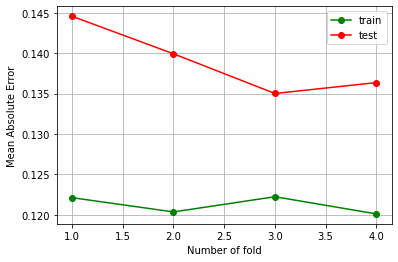

In [59]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

* **Observation** - Now we can see that, we rid off the overfit of the model. We can use the tune paramerter for final model. 

### 6. Model Training and Evaluation

* Final Model selecting with tuned parameters.(Random Forest)

In [60]:
# initialize with tuned parameters
X_train, Y_train = census_df.drop(["income"], axis=1), census_df["income"]
X_test, Y_test = census_df_test.drop(["income"], axis=1), census_df_test["income"]

random_forest = RandomForestClassifier(max_depth=100, n_estimators=30, 
                                      min_samples_split=60, max_leaf_nodes=200, 
                                      random_state=22)

# fitting data into forest
random_forest.fit(X_train, Y_train)


acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Model Score", round(acc_random_forest,2,), "%")

y_train_pred = random_forest.predict(X_train)
Y_pred = random_forest.predict(X_test)

print("Train Accuracy Score", round(accuracy_score(Y_train, y_train_pred)*100, 2))
print("Test Accuracy Score", round(accuracy_score(Y_test, Y_pred)*100, 2))
print("Precision Score", round(precision_score(Y_test, Y_pred)*100, 2))

print("Model Loss on Test data", round(mean_absolute_error(Y_test, Y_pred), 2))

Model Score 87.52 %
Train Accuracy Score 87.52
Test Accuracy Score 86.36
Precision Score 78.05
Model Loss on Test data 0.14


#### Classification Report

In [61]:
clf_report = classification_report(Y_test,
                                   Y_pred,
                                   labels=[0, 1],
                                   target_names=[0,1],
                                   output_dict=True)

<Axes: >

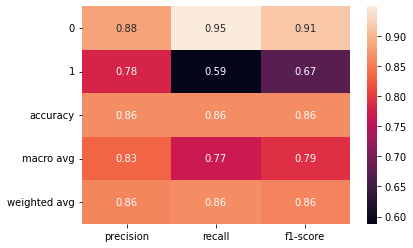

In [62]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

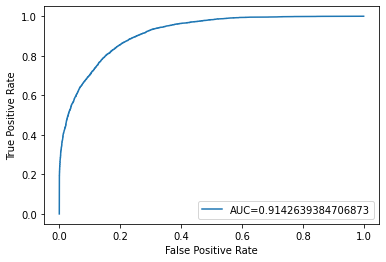

In [63]:
# The performance of a classification model at all classification thresholds
y_pred_proba = random_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

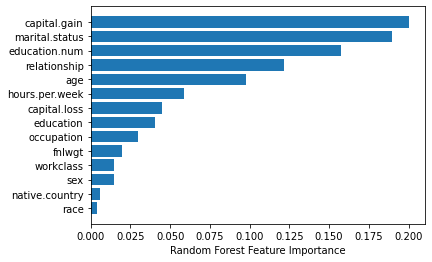

In [64]:
sorted_idx = random_forest.feature_importances_.argsort()
plt.barh(census_df.columns[sorted_idx], random_forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")



---





#### **Conclusion** The first step we took was to visualize the distribution of each feature and its effect on the likelihood of earning more than $50,000 per year. From our analysis, we concluded that the most useful features for prediction were `capital.gain`, `marital.status`, `hours per week`, `relationship`, and `age`. 